___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [3]:
import pandas as pd
# Data reader needs an update before it is compatible with current python version. Chanve is_list_like location until update.
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [104]:
# Googles API is unstable as of 2017. Use morningstar instead.

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Remove the 'Symbol' index from the import.
BAC = data.DataReader('BAC', 'morningstar', start, end).reset_index(level=0, drop=True) # Bank of America
C = data.DataReader("C", 'morningstar', start, end).reset_index(level=0, drop=True) # CitiGroup
GS = data.DataReader("GS", 'morningstar', start, end).reset_index(level=0, drop=True) # Goldman Sachs
JPM = data.DataReader("JPM", 'morningstar', start, end).reset_index(level=0, drop=True) # JPMorgan Chase
MS = data.DataReader("MS", 'morningstar', start, end).reset_index(level=0, drop=True) # Morgan Stanley
WFC = data.DataReader("WFC", 'morningstar', start, end).reset_index(level=0, drop=True) # Wells Fargo

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [105]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [109]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

** Set the column name levels (this is filled out for you):**

In [107]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [108]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info   Close   High    Low   Open    Volume  Close   High    Low   Open   
Date                                                                            
2006-01-02   46.15  46.36  45.91  46.02         0  485.3  487.1  482.2  483.5   
2006-01-03   47.08  47.18  46.15  46.92  16197900  492.9  493.8  481.1  490.0   
2006-01-04   46.58  47.24  46.45  47.00  17427400  483.8  491.0  483.5  488.6   
2006-01-05   46.64  46.83  46.32  46.58  14668900  486.2  487.8  484.0  484.4   
2006-01-06   46.57  46.91  46.35  46.80  11965700  486.2  489.0  482.0  488.8   

Bank Ticker             ...          MS                                      \
Stock Info    Volume    ...       Close     High      Low     Open   Volume   
Date                    ...                                                   
2006-01-02         0    ...     47.1008  47.3333  46.7107  47.2751        0   
2006-01-03   1536700    ...     48.4041  48.5535  47.1008  47.4578  6354408   
2006-01-04   1852790    ...     48.4373  49.2093  48.4373  48.7278  9292188   
2006-01-05   1015470    ...     48.5701  48.6365  48.1634  48.6033  6534262   
2006-01-06   1358930    ...     48.6199  48.8524  48.1883  48.7860  8146445   

Bank Ticker     WFC                                    
Stock Info    Close    High     Low    Open    Volume  
Date                                                   
2006-01-02   31.415  31.535  31.215  31.415         0  
2006-01-03   31.900  31.975  31.195  31.600  11015000  
2006-01-04   31.530  31.820  31.365  31.800  10594000  
2006-01-05   31.495  31.555  31.310  31.500   9927600  
2006-01-06   31.680  31.775  31.385  31.580   8324000  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [127]:
bank_stocks.xs(key='Close', axis=1, level=1).max()

BAC     54.9000
C      564.1000
GS     247.9200
JPM     70.0800
MS      74.1294
WFC     58.5200
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [165]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [168]:
for i in bank_stocks.xs(key='Close', axis=1, level=1).columns:
    returns[i] = bank_stocks[i]['Close'].pct_change(axis=0)

# Drop the first row because it is NaN due to no pt-1.
returns = returns[1:]
returns.head()

BAC         C        GS       JPM        MS       WFC
Date                                                                  
2006-01-04 -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05  0.001288  0.004961 -0.000393  0.003029  0.002742 -0.001110
2006-01-06 -0.001501  0.000000  0.014169  0.007046  0.001025  0.005874
2006-01-09  0.000644 -0.004731  0.012030  0.016242  0.010586 -0.000158
2006-01-10 -0.008369  0.003100  0.012578  0.001475  0.000507 -0.000789

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

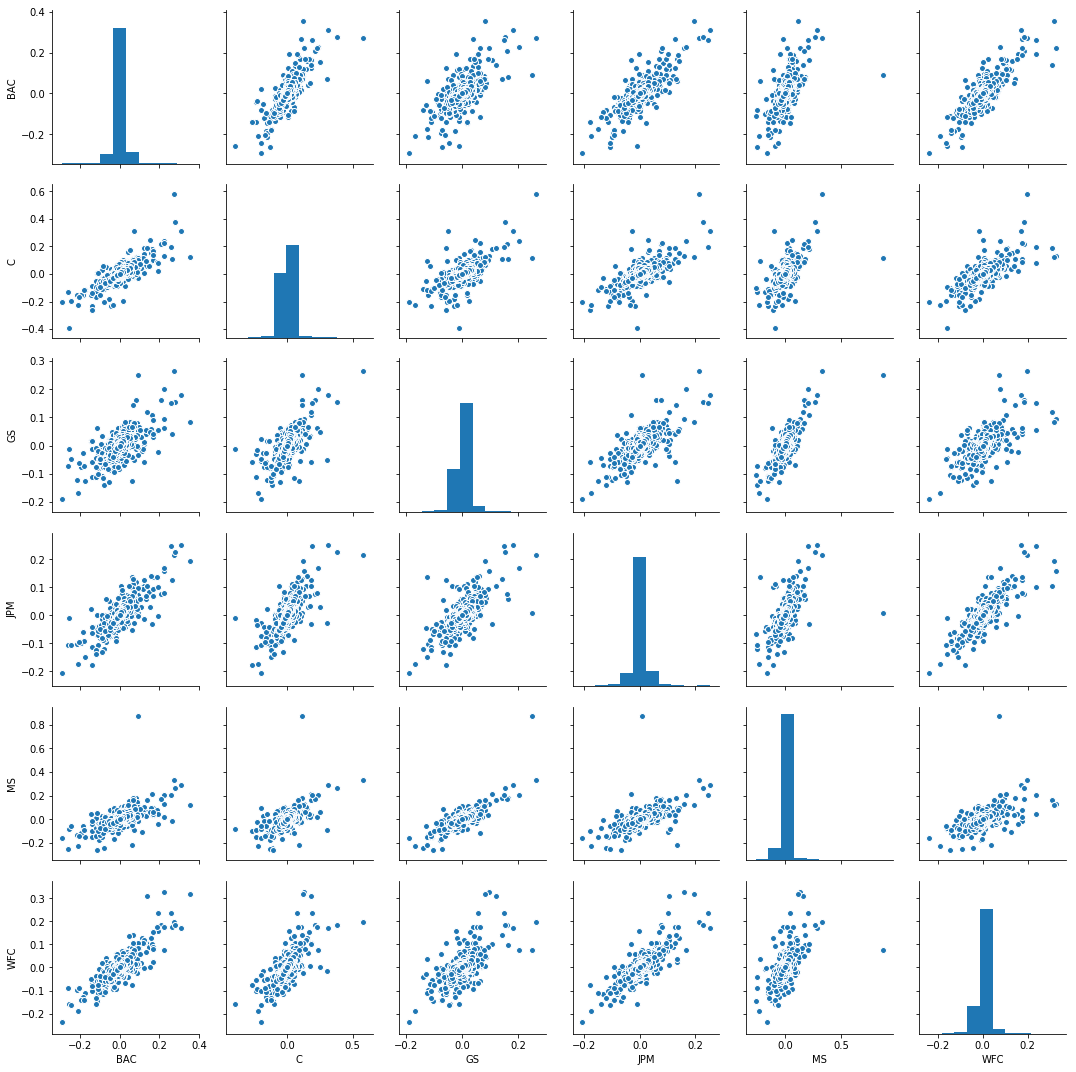

In [171]:
import seaborn as sns

sns.pairplot(returns)

# There should be a an outlier in the Citigroup reuturns from thier crash but the morningstar data
#    isn't showing it.

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [191]:
# The 2009 crash is clear.
returns.idxmin()

BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

In [179]:
returns.idxmax()

BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

For some reason Morning Star has different data for Citigroup than google does so we different results than expected.

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [195]:
# Citi had the highest std dev overall, barely beating out Morgan Stanley.
returns.std()

BAC    0.035992
C      0.037983
GS     0.024955
JPM    0.027227
MS     0.037046
WFC    0.029702
dtype: float64

In [199]:
#returns.loc['2015'].std()

# Or, to be more precise
returns.loc['2015-01-01':'2015-12-31'].std()

BAC    0.015880
C      0.015022
GS     0.013801
JPM    0.013772
MS     0.015966
WFC    0.012372
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Gregory\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


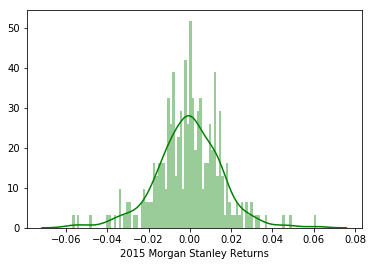

In [216]:
sns.distplot(returns.loc['2015']['MS'], bins=100, axlabel='2015 Morgan Stanley Returns', color="green")

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Gregory\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


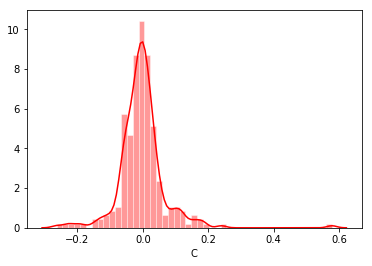

In [223]:
sns.distplot(returns['2008']['C'], color='red', hist_kws=dict(edgecolor='white', linewidth=1))

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

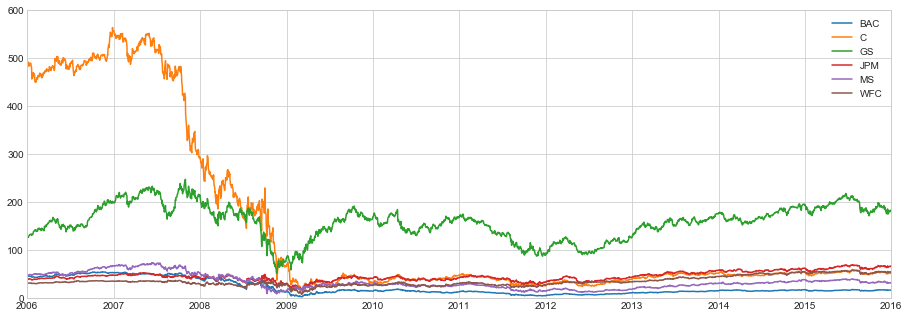

In [301]:
closing = bank_stocks.xs(key='Close', axis=1, level=1)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.plot(closing)
ax.set_xlim(['2006', '2016'])
ax.set_ylim([0, 600])
plt.legend(list(closing))

In [259]:
# Make it interactive with plotly.
bank_stocks.xs(key='Close',axis=1,level=1).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

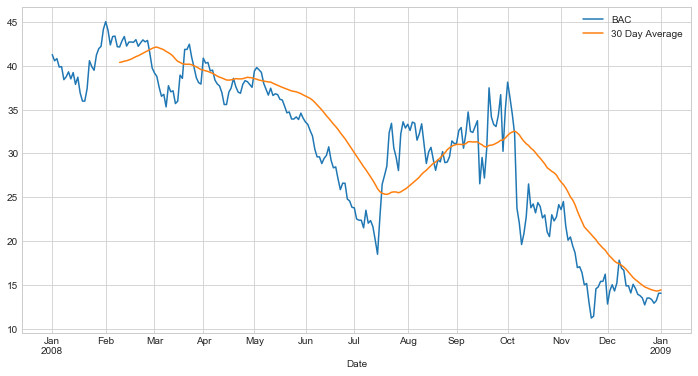

In [325]:
plt.figure(figsize=(12,6))
closing['BAC'].loc['2008-01-01':'2009-01-01'].plot()
closing['BAC'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Average')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

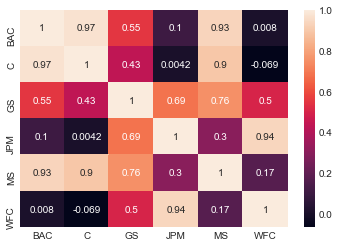

In [330]:
corr_closing = closing.corr()
sns.heatmap(data=corr_closing, annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

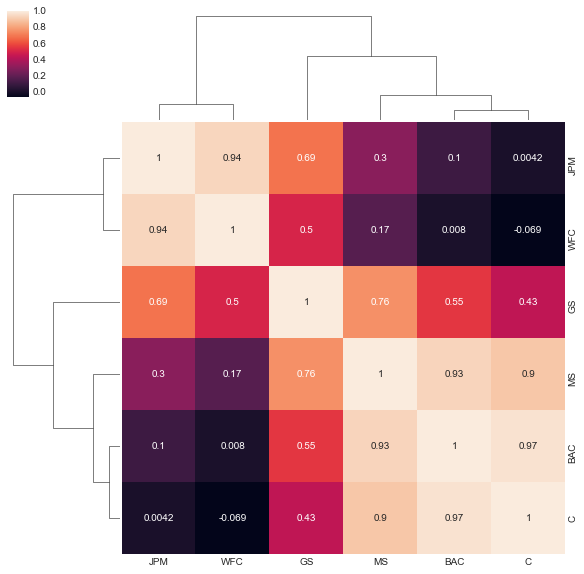

In [332]:
sns.clustermap(corr_closing, annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [342]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [346]:
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [347]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.